In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# load data
#data = pd.read_csv("/Users/brettpowers/Desktop/hf_new_small.csv")
data = pd.read_csv("/Users/rachelkim/Documents/CU/compassMachineLearning/Example Data/hf_new_small.csv")
data.drop("Unnamed: 0", axis = 1, inplace = True)
data.head()

,person_id,label,age,sex,diag_med
0,5537565608205382086,0,12,female,"4132855,444131,4066147,4289526,2414397,439060,..."
1,205040565946650389,0,69,female,"19079322,40229093,963359,1593744,35603432,4024..."
2,-7994356425511450986,0,54,male,"2414397,19079498,19075034,902741,379019,210198..."
3,2839027767049717315,0,87,male,"19025145,46287618,2211583,317898,2001537,24143..."
4,1464437645105651076,0,80,female,"435524,255848,442752,4070750,40231925,46287338..."


In [3]:
# split into training and test
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# Split into inputs and labels 
train_icmed = train_set["diag_med"]
train_label = train_set["label"]

test_icmed = test_set["diag_med"]
test_label = test_set["label"]

# Tokenizing icmed codes (tokenizer above)
vocab_size = 50

tokenize = Tokenizer(
            num_words=vocab_size,
            filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
            lower=True,
            split=",",
            char_level=False,
        )

tokenize.fit_on_texts(train_icmed)
index = tokenize.index_word

x_train = tokenize.texts_to_matrix(train_icmed)
x_test = tokenize.texts_to_matrix(test_icmed)

# Encoding with Sklearn
encoder = preprocessing.LabelBinarizer()
encoder.fit(train_label)
y_train = np.squeeze(encoder.transform(train_label))
y_test = np.squeeze(encoder.transform(test_label))

In [4]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23996,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23998,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# fit Random Forest model
forest_clf = RandomForestClassifier(n_estimators = 10, max_depth = 3, n_jobs=-1, random_state=0, verbose=1)
forest_clf.fit(x_train, y_train)
importances = forest_clf.feature_importances_
importances

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


array([0.        , 0.00700583, 0.00400187, 0.06344892, 0.03262341,
       0.        , 0.08359442, 0.07029272, 0.        , 0.02057239,
       0.        , 0.01075125, 0.03532678, 0.        , 0.01203849,
       0.        , 0.00592734, 0.0886898 , 0.00308922, 0.        ,
       0.00321429, 0.01135366, 0.        , 0.03341822, 0.0646945 ,
       0.0038238 , 0.        , 0.        , 0.02023218, 0.00340876,
       0.00107404, 0.00494716, 0.00099551, 0.        , 0.03783704,
       0.05413743, 0.01021406, 0.        , 0.00472737, 0.        ,
       0.        , 0.        , 0.        , 0.00081167, 0.05439814,
       0.00051314, 0.0677597 , 0.        , 0.13426204, 0.05081485])

In [7]:
# fit Logistic Regression
log_reg = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)
coefs = log_reg.coef_
coefs

array([[ 0.        ,  0.        , -0.34722453,  0.88506469,  0.        ,
         0.        ,  0.91386595, -0.24516822, -0.27753573,  0.45267702,
        -0.43499077, -0.5916951 ,  0.07939785,  0.60006543,  0.1881457 ,
        -0.34194051,  0.55659835, -1.55764427,  0.        , -0.20040781,
        -0.59029648, -0.33780397, -1.51401368, -0.39868597,  1.59734487,
        -0.04566057,  0.11256247,  0.        ,  0.07494257,  0.        ,
         0.        ,  0.        ,  0.51659697,  0.        , -0.05891149,
         0.07272567,  0.32784013, -0.58402639,  0.1043585 ,  0.        ,
         0.11092842,  0.        , -0.10532787,  0.11996327,  0.47684811,
        -0.12664913,  0.67293514,  0.        ,  0.10975239,  0.29570825]])

In [29]:
# dataframe for heatmap
heat_df = pd.DataFrame.from_dict(index, orient = 'index', columns = ['Code'])
heat_df = pd.concat([pd.DataFrame({'Code':'NA'}, index = [0]), heat_df])
heat_df = heat_df.head(vocab_size)
heat_df['RF Importance'] = importances
heat_df['Coefficient'] = coefs.transpose()

conditions = [
    (heat_df['Coefficient'] < 0),
    (heat_df['Coefficient'] == 0),
    (heat_df['Coefficient'] > 0)
    ]

values = [-1, 0, 1]

heat_df['Direction'] = np.select(conditions, values)

In [30]:
heat_df.head(10)

,Code,RF Importance,Coefficient,Direction
0,NA,0.000000,0.000000,0
1,2108115,0.007006,0.000000,0
2,2414397,0.004002,-0.347225,-1
3,2414398,0.063449,0.885065,1
4,35605482,0.032623,0.000000,0
5,40220357,0.000000,0.000000,0
6,320128,0.083594,0.913866,1
7,4214956,0.070293,-0.245168,-1
8,2514435,0.000000,-0.277536,-1
9,19070869,0.020572,0.452677,1


In [31]:
heat_df.drop(index=heat_df.index[0], axis=0, inplace=True)

heat_df['Heat Val'] = heat_df['RF Importance'] * heat_df['Direction']

heat_df.sort_values('RF Importance', ascending = False, inplace=True)

heat_df.drop(['RF Importance', 'Coefficient', 'Direction'], axis=1, inplace=True)
heat_df.set_index('Code', inplace=True)
heat_df.head(10)

,Heat Val
Code,
46287338,0.134262
2514437,-0.088690
320128,0.083594
4214956,-0.070293
312437,0.067760
432867,0.064694
2414398,0.063449
1127433,0.054398
42902754,0.054137


<AxesSubplot:ylabel='Code'>

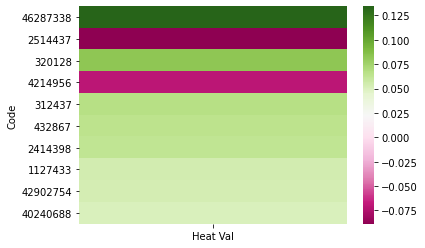

In [33]:
# plot heat map
import seaborn as sns

heat_final = heat_df.head(10)
sns.heatmap(heat_final, cmap="PiYG")